First Steps: Graham Preprocessing with OpenCV

In [265]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
input_path = "c:/DL_Lab/IDRID_dataset_orig/images/train/"
output_path = "c:/DL_Lab/IDRID_dataset/images/train/"     
import cv2 as cv

(2848, 4288, 3)


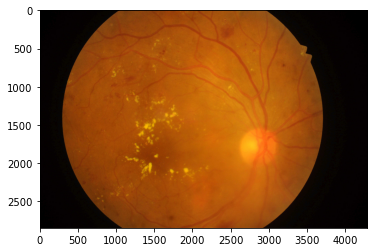

In [266]:
for file in os.listdir(input_path):
        image = cv.imread(input_path + file)
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        print(image.shape)
        plt.imshow(image)
        break

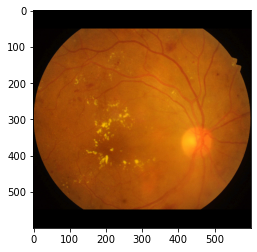

In [267]:
ofh = 430
ofw = 280

# pad image top and bottom to not lose any of the object when cropping due to ratio
image=tf.image.pad_to_bounding_box(image, offset_height=720, offset_width=0, target_height=4288, target_width=4288)
image = tf.image.crop_to_bounding_box(image, offset_height=ofh, offset_width=ofw, target_height=4288-ofh-430, target_width=4288-ofw-580)
# iris radius of 300 = 600 diameter
radius = 300
image = tf.image.resize(image, [radius*2, radius*2], method=tf.image.ResizeMethod.BILINEAR,preserve_aspect_ratio=True)
plt.imshow(image/255)

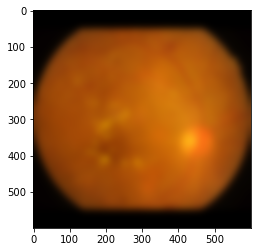

In [268]:
# calculate local mean color
image = img_to_array(image)
blur = cv.GaussianBlur(image, (0,0), radius / 30)
plt.imshow(blur/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


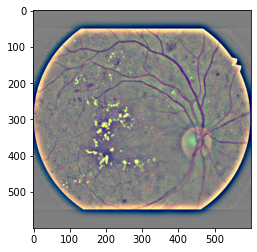

In [269]:
# subtract local mean color
image = img_to_array(image)
# addWeighted(img1, alpha, img2, beta, gamma)
# image = alpha*img1+beta*img2+gamma
# https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html
image = cv.addWeighted(image, 4, blur, -4, 128)
plt.imshow(image/255)

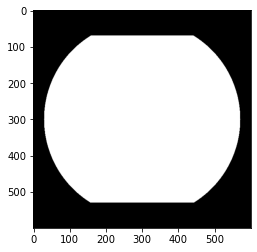

In [270]:
mask = np.zeros(image.shape)
# circle(mask, center, radius, color, thickness, linetype, shift)
# 0.9*radius removes boundary effects
cv.circle(mask, (image.shape[0] // 2, image.shape[1] // 2), int(0.9*radius), (1, 1, 1), -1, 8, 0)

mask[0:70, :, :] = 0
mask[530:, :, :] = 0

plt.imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


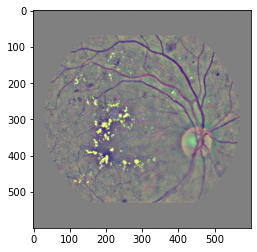

In [271]:
# apply mask and change black pixels to grey
plt.imshow((image*mask + 128 * (1-mask)) / 255)